# Author:Mehenaz Taherin
### Data Science & Business Analytics Intern
### GRIP - The Sparks Foundation


**Task 1 : Prediction using Supervised Machine Learning**

**Task objective:** 
* Predict the percentage of an student based on the no. of study hours.
* Implement simple linear regression  as it involves just 2 variables.
* Predicte score if a student studies for 9.25 hrs/ day?

In [1]:
#import Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

**Read the dataset from remote link**

In [2]:
df1=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df1

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**gain primary information from the dataset**

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**check any null value**

In [4]:
df1.isnull().values.any()

False

**get a count of the empty values for each columns**

In [5]:
df1.isna().sum()

Hours     0
Scores    0
dtype: int64

**The next phase is to enter distribution scores and plot them according to the requirement**

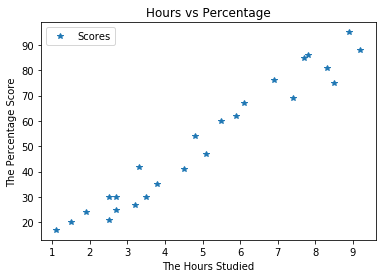

In [6]:
df1.plot(x='Hours', y='Scores', style='*')    
plt.title('Hours vs Percentage')    
plt.xlabel('The Hours Studied')    
plt.ylabel('The Percentage Score')    
plt.show() 

**For Preparing the data we need to divide the data into "attributes" (inputs) and "labels" (outputs).**

In [8]:
X= df1.iloc[:, :-1].values  #all the rows and 1st col for attribute   
Y = df1.iloc[:, 1].values  #all the rows and 2nd col for labels

**now splitting of data into the training and test sets using Scikit Learn's builtin method of train_test_split(), as below:
Taking 80:20 for Traning:testing**

In [9]:
from sklearn.model_selection import train_test_split    
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=0)

**Checking the shapes for all the sets**

In [10]:
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('Y_train: ', Y_train.shape)
print('Y_test: ', Y_test.shape)

X_train:  (20, 1)
X_test:  (5, 1)
Y_train:  (20,)
Y_test:  (5,)


**now,Train the algorithm**

In [12]:
from sklearn.linear_model import LinearRegression    
regressor = LinearRegression()    
regressor.fit(X_train, Y_train)   
  
print("Training ... Completed !.")

Training ... Completed !.


**Displaying model parameters**

In [13]:
print('Intercept of line: ',regressor.intercept_)
print('Coefficent of Hours: ',regressor.coef_)

Intercept of line:  2.018160041434683
Coefficent of Hours:  [9.91065648]


**Plotting the regression line**

In [14]:
# determine the regression line
line = regressor.coef_*X+regressor.intercept_

**Plotting the whole data with regression line**

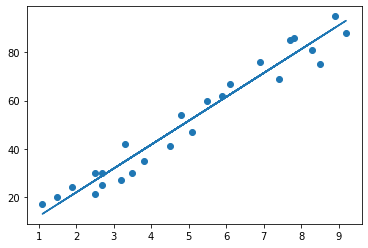

In [15]:
plt.scatter(X, Y)
plt.plot(X, line)
plt.show()

**Plotting the regression line for training data**

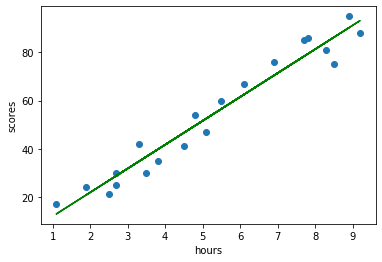

In [16]:
line = regressor.coef_*X_train+regressor.intercept_
plt.scatter(X_train, Y_train)
plt.plot(X_train,line,color="green")
plt.xlabel('hours')
plt.ylabel('scores')
plt.show()

**plotting the regression line for test data**

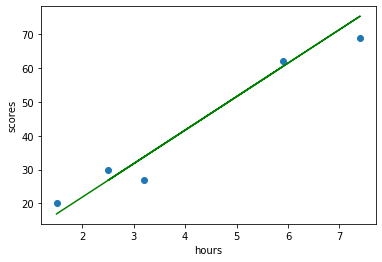

In [17]:
line = regressor.coef_*X_test+regressor.intercept_
plt.scatter(X_test, Y_test)
plt.plot(X_test,line,color="green")
plt.xlabel('hours')
plt.ylabel('scores')
plt.show()

**testing data(in hours)and predicting the scores**

In [19]:
print('X_test: ',X_test) 
y_pred = regressor.predict(X_test) 
print('y_pred',y_pred)

X_test:  [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
y_pred [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


**Comparing Actual vs Predicted**

In [20]:
df=pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**plot the df**

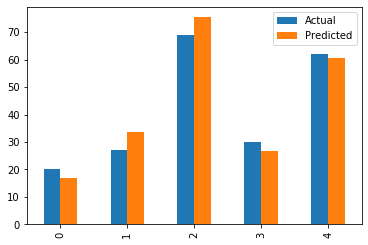

In [21]:
df.plot(kind='bar')
plt.show()

**Now, test with other data(say for What will be predicted score if a student studies for 9.25 hrs/ day?**

In [22]:
hours=np.array([9.25])
newhours = hours.reshape(-1,1)
own_pred = regressor.predict(newhours)


In [23]:
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [9.25]
Predicted Score = 93.69173248737538


**model evaluation for testing set**

In [24]:
from sklearn import metrics  
mae = metrics.mean_absolute_error(Y_test, y_pred)
mse = metrics.mean_squared_error(Y_test, y_pred)
r2 = metrics.r2_score(Y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 4.183859899002975
MSE is 21.5987693072174
R2 score is 0.9454906892105356


**Conclusion:** Finally,our objective has been fulfilled.
#### Thankyou